<a href="https://colab.research.google.com/github/RovilSurioJr/Numerical-Methods/blob/master/Numerical_Integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical Integration
$_{\text{©L.A. Guy ©R.Surio ©M.A. Sustento ©T.J. Vallarta  | 2021 | Computational Methods for Computer Engineers}}$

In this module, we will learn how numerical integration works and how you can solve them computationally using Python and compare each different integration rule by computing the error it produced. We will also cover the numerical integration functions implemented in scipy. This module will cover:

* Scipy Quad Function
* Scipy Romberg Function
* Trapezoidal Rule
* Simpson's 1/3 Integration Rule
* Simpson's 3/8 Integration Rule
* Monte Carlo Simulations/Integration
* Law of Big numbers

In [434]:
import numpy as np
from scipy.integrate import quad
from scipy.integrate import dblquad
from scipy.integrate import trapz
from scipy.integrate import romberg

## PART 1

### SciPy Quad Function

The quad function computes for the definite integral. This function utilizes the QUADPACK from the Fortran library [1]. The QUADPACK estimates the integrals using the numerical quadrature [2]. The quad function performs the following:
$$\int^b_af(x)dx$$

In [435]:
f1 = lambda x: x**5 + 5*x**4 + 3*x**3 + 2*x + 5 
lb = 0
ub = 5

In [436]:
quad(f1,lb,ub)

(6247.916666666668, 6.936580939272593e-11)

In [437]:
f2 = lambda x: np.cos(x)*np.sin(x) 
lb = 0
ub = np.pi/4

In [438]:
quad(f2,lb,ub)

(0.24999999999999997, 2.775557561562891e-15)

In [439]:
f3 = lambda x: 1/(x*(np.log(x)))
lb = 2
ub = 3

In [440]:
quad(f3,lb,ub)

(0.4605607481983634, 5.113251468884121e-15)

In [441]:
f4 = lambda x: x**6 + 2*x
lb = -1
ub = 0

In [442]:
quad(f4,lb,ub)

(-0.8571428571428572, 9.516197353929914e-15)

In [443]:
f5 = lambda x: np.sin(x**2)+2*np.sin(x)
lb = 0
ub = np.pi

In [444]:
quad(f5,lb,ub)

(4.772651712690067, 1.7562330009932296e-12)

In [445]:
f6 = lambda x: np.log(2*x)
lb = 2
ub = 5

In [446]:
quad(f6,lb,ub)

(5.740336742730447, 6.373054020881115e-14)

### Scipy Romberg Function


The Romberg function of SciPy follows the Romberg Integration theory. The Romberg integration theory uses the Trapezoidal formula multiple times to get a better result. The Romberg combines the first trapezoidal application with one trapezoid and combines it with another trapezoidal application but this time uses two trapezoids and combines the result. The number of trapezoids used for each iteration increases by $ 2^n$. The combinations of the trapezoids will also be combined which will make the result more desirable. To further understand the concept, look at the illustration of the Romberg Integration:
![image](https://miro.medium.com/max/1286/1*haJeX57EYzB68sCahttRsA.png)

In [447]:
romberg_error = []

In [448]:
f1 = lambda x: x**5 + 5*x**4 + 3*x**3 + 2*x + 5 
lb = 0
ub = 5
S = romberg(f1,lb,ub)
print(S)
err = abs(6247.916-S)
romberg_error.append(err)
err

6247.916666666667


0.0006666666668024845

In [449]:
f2 = lambda x: x**6 + 2*x
lb = -1
ub = 0
S = romberg(f2,lb,ub)
print(S)
err = abs(-0.857-S)
romberg_error.append(err)
print(err)

-0.8571428571428571
0.00014285714285711126


In [450]:
f3 = lambda x: 1/(x*(np.log(x)))
lb = 2
ub = 3
S = romberg(f3,lb,ub)
print(S)
err = abs(0.460-S)
romberg_error.append(err)
err

0.46056074820071424


0.0005607482007142228

In [451]:
f4 = lambda x: np.log(2*x)
lb = 2
ub = 5
S = romberg(f4,lb,ub)
print(S)
err = abs(5.74-S)
romberg_error.append(err)

err

5.740336742706072


0.0003367427060716466

In [452]:
f5 = lambda x: np.cos(x)*np.sin(x)
lb = 0
ub = np.pi/4
S = romberg(f5,lb,ub)
print(S)
err = abs(0.25-S)
romberg_error.append(err)

err

0.24999999999950429


4.957145804951324e-13

In [453]:
f6 = lambda x: np.sin(x**2)+2*np.sin(x)
lb = 0
ub = np.pi
S = romberg(f6,lb,ub)
print(S)
err = abs(4.772-S)
romberg_error.append(err)
print(err)

4.77265171261761
0.0006517126176097676


In [454]:
romberg_error

[0.0006666666668024845,
 0.00014285714285711126,
 0.0005607482007142228,
 0.0003367427060716466,
 4.957145804951324e-13,
 0.0006517126176097676]

## PART 2

The equation the will be used are:
$$\int^{5}_0x^5 - 5x^4 +3x^3 + 2x + 5dx = 6247.916  \\ _{\text{(Higher Order Polynomial)}}$$ $$ \int^{0}_{-1}x^6 + 2xdx = -0.857 \\ _{\text{(Higher Order Polynomial)}} $$ and $$\int^{3}_{2}\frac{1}{xlog_{10}x}dx = 0.460 \\ _{\text{(Logarithmic Function)}}$$ $$ \int^{5}_{2} log_{10}2xdx = 5.74 \\ _{\text{(Logarithmic Function)}} $$ and $$ \int^{\frac{\pi}{4}}_0 cos(x)sin(x)dx = 0.25 \\ _{\text{(Trigonometric Function)}}$$ $$ \int^{\pi}_0sin(x^2)+2sin(x)dx = 4.772 \\ _{\text{(Trigonometric Function)}}$$

### Trapezoidal rule

In [455]:
def trapz_rule(func,lb,ub,size):
  h = (ub-lb)/size
  return h*(0.5*(func(lb)+func(ub))+np.sum(func(lb+h*np.arange(1,size))))

In [456]:
trapz_error = []

In [457]:
f1 = lambda x: x**5 + 5*x**4 + 3*x**3 + 2*x + 5 
lb = 0
ub = 5
S = trapz_rule(f1,lb,ub,1e6)
print(S)
err = abs(6247.916-S)
print(err)
trapz_error.append(err)

6247.916666678857
0.0006666788567599724


In [458]:
f2 = lambda x: x**6 + 2*x
lb = -1
ub = 0
S = trapz_rule(f2,lb,ub,1e6)
print(S)
err = abs(-0.857-S)
print(err)
trapz_error.append(err)

-0.857142857142357
0.0001428571423570668


In [459]:
f3 = lambda x: 1/(x*(np.log(x)))
lb = 2
ub = 3
S = trapz_rule(f3,lb,ub,1e6)
print(S)
err = abs(0.460-S)
print(err)
trapz_error.append(err)

0.4605607481984205
0.000560748198420502


In [460]:
f4 = lambda x:np.log(2*x)
lb = 2
ub = 5
S = trapz_rule(f4,lb,ub,1e6)
print(S)
err = abs(5.74-S)
print(err)
trapz_error.append(err)

5.740336742730222
0.000336742730222106


In [461]:
f5 = lambda x: np.cos(x)*np.sin(x)
lb = 0
ub = np.pi/4
S = trapz_rule(f5,lb,ub,1e6)
print(S)
err = abs(0.25-S)
print(err)
trapz_error.append(err)

0.24999999999994854
5.1458837191376006e-14


In [462]:
f6 = lambda x: np.sin(x**2)+2*np.sin(x)
lb = 0
ub = np.pi
S = trapz_rule(f6,lb,ub,1e6)
print(S)
err =abs(4.772-S)
trapz_error.append(err)
err


4.77265171268211


0.0006517126821101726

In [463]:
trapz_error

[0.0006666788567599724,
 0.0001428571423570668,
 0.000560748198420502,
 0.000336742730222106,
 5.1458837191376006e-14,
 0.0006517126821101726]

In [464]:
np.mean(trapz_error)

0.0003931232683202131

### Simpson's 1/3 Rule

In [465]:
simpperror = []

In [466]:
def simp_13(func,lb,ub,divs):
  h = (ub-lb)/divs
  A = (func(lb)+func(ub))+ \
            np.sum(4*func(lb+h*np.arange(1,divs,2)))+ \
            np.sum(2*func(lb+h*np.arange(2,divs,2)))
  S = (h/3)*A
  return S

In [467]:
f1 = lambda x: x**5 + 5*x**4 + 3*x**3 + 2*x + 5 
sum = simp_13(f1, 0,5,1e4)
error = (abs((6247.916)-(sum)))
simpperror.append(error)

In [468]:
f2 = lambda x: x**6 + 2*x
sum = simp_13(f2, -1,0,1e4)
error = (abs((-0.857)-(sum)))
simpperror.append(error)

In [469]:
f3 = lambda x: 1/(x*(np.log(x)))
sum = simp_13(f3,2,3,1e4)
error = (abs((0.460)-(sum)))
simpperror.append(error)

In [470]:
f4 = lambda x: np.log(2*x)
sum = simp_13(f4,2,5,1e4)
error = (abs((5.74)-(sum)))
simpperror.append(error)

In [471]:
f5 = lambda x: np.cos(x)*np.sin(x) 
sum = simp_13(f5,0,np.pi/4,1e4)
error = (abs((0.25)-(sum)))
simpperror.append(error)

In [472]:
f6 = lambda x: np.sin(x**2)+2*np.sin(x)
sum = simp_13(f6,0,np.pi,1e4)
error = (abs((4.772)-(sum)))
simpperror.append(error)

In [473]:
print(simpperror)


[0.0006666666658929898, 0.00014285714285722229, 0.0005607481983633256, 0.00033674273044681513, 0.0, 0.0006517126900789094]


In [474]:
np.mean(simpperror)

0.000393121237939877

### Simpson's 3/8 Rule

In [475]:
simperror = []

In [476]:
def simp_38(func,lb,ub,divs):
  h = (ub-lb)/divs
  A = (func(lb)+func(ub))+ \
            np.sum(3*(func(lb+h*np.arange(1,divs,3))))+ \
            np.sum(3*(func(lb+h*np.arange(2,divs,3))))+ \
            np.sum(2*func(lb+h*np.arange(3,divs,3)))
  S = (3*h/8)*A
  return S

In [477]:
f1 = lambda x: x**5 + 5*x**4 + 3*x**3 + 2*x + 5 
sum = simp_38(f1, 0,5,1e4)
error = (abs((6247.916)-(sum)))
simperror.append(error)
#print("Error:",error)

In [478]:
f2 = lambda x: x**6 + 2*x
sum = simp_38(f2, -1,0,1e4)
error = (abs((-0.857)-(sum)))
simperror.append(error)
#print("Error:",error)

In [479]:
f3 = lambda x: 1/(x*(np.log(x)))
sum = simp_38(f3,2,3,1e4)
error = (abs((0.460)-(sum)))
simperror.append(error)
#print("Error:",error)

In [480]:
f4 = lambda x: np.log(2*x)
sum = simp_38(f4,2,5,1e4)
error = (abs((5.74)-(sum)))
simperror.append(error)
#print("Error:",error)

In [481]:
f5 = lambda x: np.cos(x)*np.sin(x) 
sum = simp_38(f5,0,np.pi/4,1e4)
error = (abs((0.25)-(sum)))
simperror.append(error)
#print("Error:",error)

In [482]:
f6 = lambda x: np.sin(x**2)+2*np.sin(x)
sum = simp_38(f6,0,np.pi,1e4)
error = (abs((4.772)-(sum)))
simperror.append(error)
#print("Error:",error)

In [483]:
print(simperror)

[0.8291504476819682, 0.00014285464285701543, 0.0005531626299827286, 0.00016405109844974675, 9.817477062690205e-06, 0.0006854138321159553]


In [484]:
np.mean(simperror)

0.1384509578937394

### Monte Carlo Integration

In [485]:
def monte_carlo(f,a,b,n,f_s):
  samples = np.random.uniform(a,b,int(n)) 
  mean = np.mean(f(samples))
  S = (b-a)*mean # formula
  errors = (abs((f_s)-(S))) # errors formula
  return S, errors

In [486]:
f1 = lambda x: x**5 + 5*x**4 + 3*x**3 + 2*x + 5 
lb = 0
ub = 5
monte_carlo(f1,lb,ub,1000,6247.916)

(6642.540000334153, 394.6240003341527)

In [487]:
f2 = lambda x: x**6 + 2*x
lb = -1
ub = 0
monte_carlo(f2,lb,ub,1000,-0.857)

(-0.8675346156621222, 0.010534615662122215)

In [488]:
f3 = lambda x: 1/(x*(np.log(x)))
lb = 2
ub = 3
monte_carlo(f3,lb,ub,1000,0.460)

(0.4596917863115959, 0.0003082136884041131)

In [489]:
f4 = lambda x: np.log(2*x)
lb = 2
ub = 5
monte_carlo(f4,lb,ub,1000,5.74)

(5.789843399844449, 0.04984339984444919)

In [490]:
f5 = lambda x: np.cos(x)*np.sin(x) 
lb = 0
ub = np.pi/4
monte_carlo(f5,lb,ub,1000,0.25)

(0.2542960513382307, 0.004296051338230689)

In [491]:
f6 = lambda x: np.sin(x**2)+2*np.sin(x)
lb = 0
ub = np.pi
monte_carlo(f6,lb,ub,1000,4.772)

(4.656203288139387, 0.11579671186061358)

The error was computed after implementing the trapezoidal, Simpson's 1/3, Simpson's 3/8, and Monte Carlo integration techniques with the 6 sample cases provided by the authors. The trapezoidal and Simpson's 1/3 both have 0.0003 mean errors while the Simpson's 3/8 has 0.1385 mean error. With these data, it can be concluded that the trapezoidal and Simpson's 1/3 is better than Simpson's 3/8 in solving the specific set of functions provided by the authors in this module. Meanwhile, the Monte Carlo Integration has an inconsistent error values since it uses random sampling to produce its samples. It needs to have a significant amount of iteration to determine its theoretical value since it follows the law of large numbers.

## PART 3

### Simpson's 3/8 Rule



In [ ]:
def simp_38(func,lb,ub,divs):
  h = (ub-lb)/divs
  A = (func(lb)+func(ub))+ \
            np.sum(3*(func(lb+h*np.arange(1,divs,3))))+ \
            np.sum(3*(func(lb+h*np.arange(2,divs,3))))+ \
            np.sum(2*func(lb+h*np.arange(3,divs,3)))
  S = (3*h/8)*A
  return S

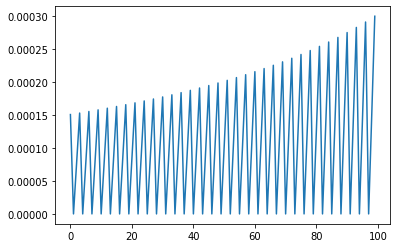

In [ ]:
import matplotlib.pyplot as plt
divs = 2e4
sumresults = []
allerrors = []
for i in range (0,100):
  divs -=100
  f = lambda x: 6*x**2-5*x+2
  sum = simp_38(f,-3,1,divs)
  sumresults.append(sum)

for i in sumresults:
  errors = (abs((84)-(i)))
  allerrors.append(errors)

x_range = np.arange(0,100)
y_range = allerrors
plt.plot(x_range,y_range)


The Figure above shows that with a arbitrary large number equals to 20000 for a bin at first iteration, the smallest error can be observed and by decreasing it by 100 every iteration, it can be observed that the error gets high also and this can be related to law of big number in where stated that the higher number of samples results to getting more closer into theoretical value [3]. Therefore, the first iteration have the smallest error since this is where higher number of bin or sample in statistical term located in all iteration while in the 100th iteration, the bin has a value of 10000 and this results to higher error compare to first iteration.

### Monte Carlo Simulation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

The equation that will be used:
$$\int^{1}_{-3}(6x^2 - 5x +2)dx = 84 $$


In [ ]:
def monte_carlo(f,a,b,n,f_s):
  
  S_results = [] 
  all_errors = [] 
 
  for i in range(0,10000): # for loop that appends in the S_results
    n += 100 # increase sample size
    samples = np.random.uniform(a,b,int(n)) 
    mean = np.mean(f(samples))
    S = (b-a)*mean # formula 
    S_results.append(S)

  for i in S_results: # for loop that appends in all_errors
    errors = (abs((f_s)-(i))) # errors formula
    all_errors.append(errors)

  x_range = np.arange(0,10000) 

  y_range_errors = all_errors # y of all_errors

  y_range_S = S_results # y of S_results

  fig, axs = plt.subplots(2, 1) # creates subplots
  axs[0].plot(x_range, y_range_errors) # plotting errors
  axs[0].set_title("Errors") 
  axs[1].plot(x_range, y_range_S) # plotting average
  axs[1].set_title("Average")

  fig.tight_layout() # adjusts spacing between subplots
  plt.show()

In [ ]:
f = lambda x: 6*x**2-5*x+2 # function
a = -3 # lower bound
b = 1 # upper bound
n = 100 # sample size
f_s = 84 # theoretical value
monte_carlo(f,a,b,n,f_s)

KeyboardInterrupt: ignored

The Monte Carlo method uses random sampling to solve statistical problems. This is the reason why np.random.uniform() was used to create the samples. In order to decrease the size of its errors, the law of big numbers will be used by running the Monte Carlo simulation for 10000 iterations while increasing the sample sizes by a factor of 100. The law of big numbers states that performing the same experiment a large number of times will yield a result closer to the expected value as more trials are performed [4]. Based on the results of the 1st graph titled "Errors", it can be seen that as the trials increases, the errors decreases as well. For the 2nd graph titled "Average", the law of big numbers can be seen where as the trials increase, the result comes closer to the theoretical value which is 84.

##References
[1] SciPy (2021) [**Scipy Source Code**](https://github.com/scipy/scipy/blob/v1.6.3/scipy/integrate/quadpack.py#L49-L442) \\
[2] Florida State University (2010) [***QUADPACK Numerical Integration***](https://people.sc.fsu.edu/~jburkardt/f77_src/quadpack/quadpack.html) \\
[3] Siegrist (2021) [***The Law of Large Numbers***](https://stats.libretexts.org/Bookshelves/Probability_Theory/Book%3A_Probability_Mathematical_Statistics_and_Stochastic_Processes_(Siegrist)/06%3A_Random_Samples/6.03%3A_The_Law_of_Large_Numbers) \\
[4] Michael, Dekking (2005) [***A modern introduction to probability and statistics : understanding why and how***](https://archive.org/details/modernintroducti00fmde)